In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading graph
if not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader.csv'):
    traincsv = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/timeuser_train_8.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of diplicate entries: ",sum(traincsv.duplicated()))
    traincsv = traincsv.dropna()
    traincsv = traincsv.drop_duplicates()
    traincsv = traincsv.astype('int64')
    traincsv.to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 20187
Number of edges: 38719
Average in degree:   1.9180
Average out degree:   1.9180


In [ ]:
g=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 20187
Number of edges: 38719
Average in degree:   1.9180
Average out degree:   1.9180


Name: 
Type: DiGraph
Number of nodes: 49
Number of edges: 48
Average in degree:   0.9796
Average out degree:   0.9796


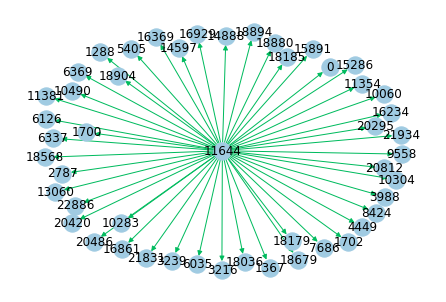

In [ ]:
if not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader_sample.csv'):
    pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/timeuser_train_8.csv', nrows=50).to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader_sample.csv',header=False,index=False)
    
subgraph=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

In [ ]:
# No of Unique persons 
print("The number of unique persons",len(g.nodes()))

The number of unique persons 20187


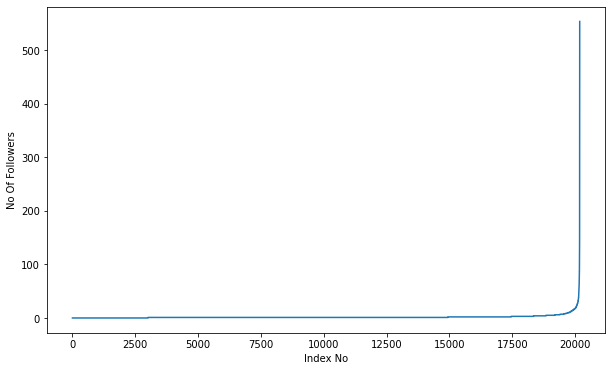

In [ ]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

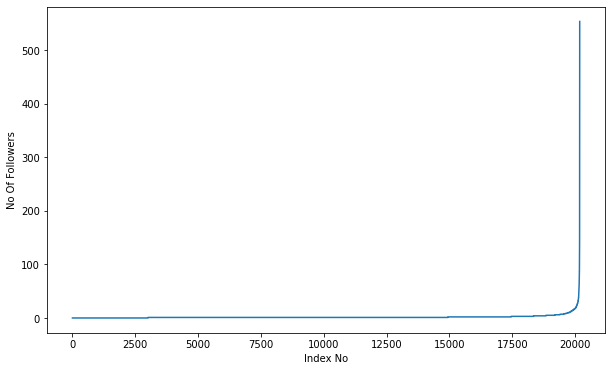

In [ ]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

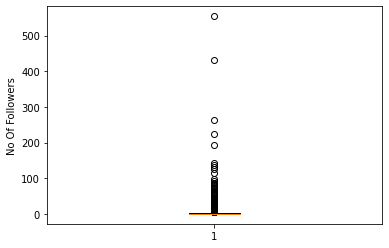

In [ ]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [ ]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 3.0
91 percentile value is 4.0
92 percentile value is 4.0
93 percentile value is 4.0
94 percentile value is 5.0
95 percentile value is 5.0
96 percentile value is 6.0
97 percentile value is 8.0
98 percentile value is 11.0
99 percentile value is 17.0
100 percentile value is 554.0


In [ ]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 18.0
99.2 percentile value is 19.0
99.3 percentile value is 21.0
99.4 percentile value is 23.0
99.5 percentile value is 25.06999999999971
99.6 percentile value is 28.0
99.7 percentile value is 32.4419999999991
99.8 percentile value is 40.62800000000061
99.9 percentile value is 68.07000000001062
100.0 percentile value is 554.0


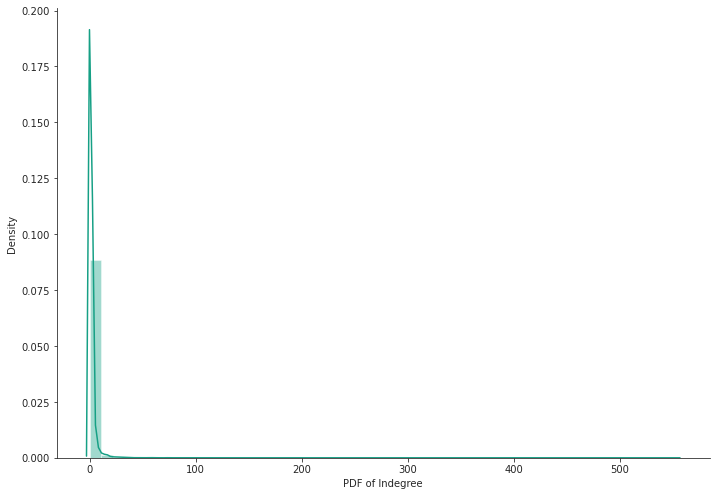

In [ ]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

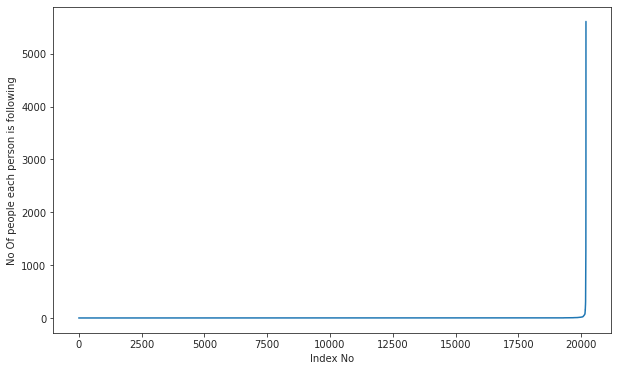

In [ ]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

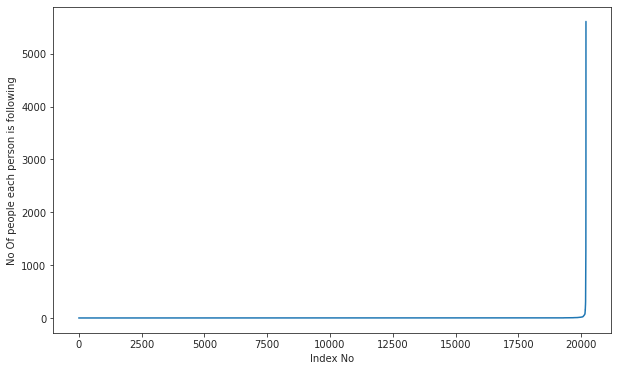

In [ ]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

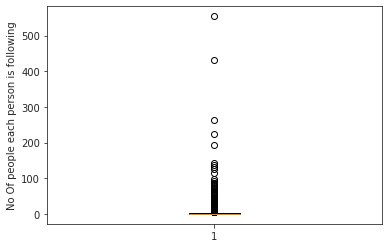

In [ ]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [ ]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 2.0
96 percentile value is 3.0
97 percentile value is 4.0
98 percentile value is 7.0
99 percentile value is 15.0
100 percentile value is 5612.0


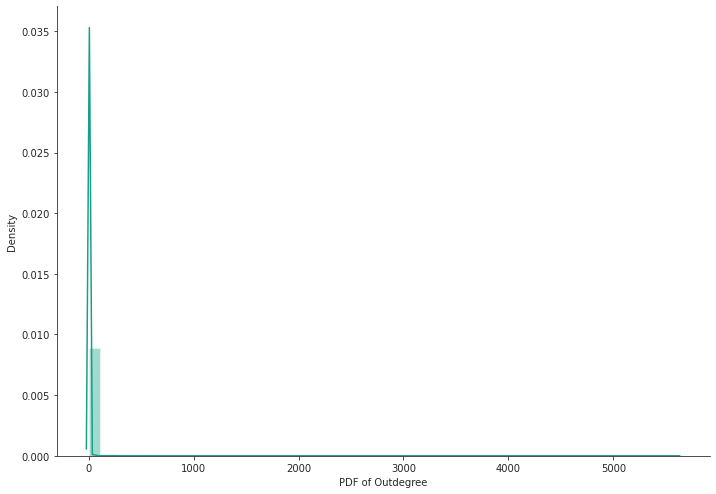

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [ ]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
                                sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 14721 and % is 72.92316837568733


In [ ]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',
                                sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 3006 and % is 14.890771288452965


In [ ]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


In [ ]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

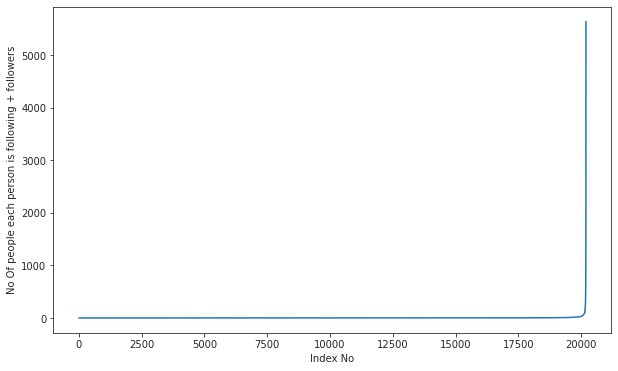

In [ ]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

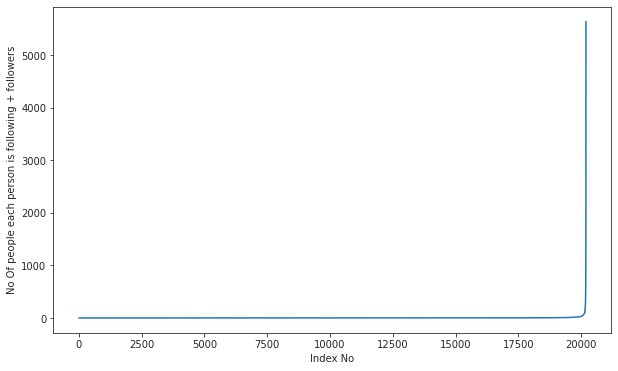

In [ ]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [ ]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 4.0
91 percentile value is 5.0
92 percentile value is 5.0
93 percentile value is 6.0
94 percentile value is 6.0
95 percentile value is 8.0
96 percentile value is 9.0
97 percentile value is 12.0
98 percentile value is 18.0
99 percentile value is 31.0
100 percentile value is 5644.0


In [ ]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 35.0
99.2 percentile value is 39.0
99.3 percentile value is 42.69800000000032
99.4 percentile value is 55.0
99.5 percentile value is 61.06999999999971
99.6 percentile value is 73.0
99.7 percentile value is 86.0
99.8 percentile value is 126.0
99.9 percentile value is 274.88400000001275
100.0 percentile value is 5644.0


In [ ]:
print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')

Min of no of followers + following is 1
13740  persons having minimum no of followers + following


In [ ]:
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')

Max of no of followers + following is 5644
1  persons having maximum no of followers + following


In [ ]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 19400


In [ ]:
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))

No of persons having followers + following less than 10 are 19400


In [ ]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 862
weakly connected components wit 2 nodes 729


In [ ]:
%%time
###generating bad edges from given graph
import random
#getting all set of edges
r = csv.reader(open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_woheader.csv','r'))
edges = dict()
for edge in r:
    edges[(edge[0], edge[1])] = 1
    
    
missing_edges = set([])
while (len(missing_edges)<38719*100):
    a=random.randint(1, 20187)
    b=random.randint(1, 20187)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            if nx.shortest_path_length(g,source=a,target=b) > 2: 

                missing_edges.add((a,b))
            else:
                continue  
        except:  
                missing_edges.add((a,b))              
    else:
        continue
pickle.dump(missing_edges,open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/missing_edges_final.p','wb'))

missing_edges = pickle.load(open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/missing_edges_final.p','rb'))

CPU times: user 52.7 s, sys: 951 ms, total: 53.6 s
Wall time: 54.6 s


In [ ]:
len(missing_edges)

3871900

In [ ]:
from sklearn.model_selection import train_test_split
    #reading total data df
df_pos = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/timeuser_train_8.csv')
df_pos = df_pos.dropna()
df_pos = df_pos.drop_duplicates()
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])

print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])

#Trian test split 
#Spiltted data into 80-20 
#positive links and negative links seperatly because we need positive training data only for creating graph 
#and for feature generation
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

#removing header and saving
X_train_pos, X_test_pos, X_train_neg, X_test_neg = X_train_pos.astype('int64'), X_test_pos.astype('int64'), X_train_neg.astype('int64'), X_test_neg.astype('int64')
X_train_pos.to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_pos_after_eda.csv',header=False, index=False)
X_test_pos.to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_pos_after_eda.csv',header=False, index=False)
X_train_neg.to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_neg_after_eda.csv',header=False, index=False)
X_test_neg.to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_neg_after_eda.csv',header=False, index=False)

#Graph from Traing data only 
# del missing_edges

Number of nodes in the graph with edges 38719
Number of nodes in the graph without edges 3871900
Number of nodes in the train data graph with edges 30975 = 30975
Number of nodes in the train data graph without edges 3097520 = 3097520
Number of nodes in the test data graph with edges 7744 = 7744
Number of nodes in the test data graph without edges 774380 = 774380


In [ ]:
if (os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_pos_after_eda.csv')) and (os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

Name: 
Type: DiGraph
Number of nodes: 17371
Number of edges: 30975
Average in degree:   1.7831
Average out degree:   1.7831
Name: 
Type: DiGraph
Number of nodes: 6157
Number of edges: 7744
Average in degree:   1.2578
Average out degree:   1.2578
no of people common in train and test --  3341
no of people present in train but not present in test --  14030
no of people present in test but not present in train --  2816
 % of people not there in Train but exist in Test in total Test data are 45.736560012993344 %


In [ ]:
# #final train and test data sets
# if (not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/train_after_eda.csv')) and \
# (not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/test_after_eda.csv')) and \
# (not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/train_y.csv')) and \
# (not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/test_y.csv')) and \
# (os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/train_pos_after_eda.csv')) and \
# (os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/test_pos_after_eda.csv')) and \
# (os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/train_neg_after_eda.csv')) and \
# (os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/test_neg_after_eda.csv')):

X_train_pos = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_test_pos = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_train_neg = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_neg_after_eda.csv', names=['source_node', 'destination_node'])
X_test_neg = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_neg_after_eda.csv', names=['source_node', 'destination_node'])

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])


X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 
X_train, y_train, X_test, y_test = X_train.astype('int64'), y_train.astype('int64'), X_test.astype('int64'), y_test.astype('int64')
X_train.to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_after_eda.csv',header=False,index=False)
X_test.to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 30975
Number of nodes in the train data graph without edges 3097520
Number of nodes in the test data graph with edges 7744
Number of nodes in the test data graph without edges 774380


In [ ]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (3128495, 2)
Data points in test data (782124, 2)
Shape of traget variable in train (3128495,)
Shape of traget variable in test (782124,)


In [ ]:
X_test

,source_node,destination_node
0,3305,15953
1,18233,10761
2,12065,21581
3,11644,9558
4,6463,22376
...,...,...
782119,15904,19374
782120,4589,17442
782121,9320,5357
782122,17074,17596


In [ ]:
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

In [ ]:
train_graph=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 17371
Number of edges: 30975
Average in degree:   1.7831
Average out degree:   1.7831


In [ ]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim

In [ ]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [ ]:
#one test case
print(jaccard_for_followees(1361,2015))

0


In [ ]:
#node 1635354 not in graph 
print(jaccard_for_followees(105250,43737))

0


In [ ]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [ ]:
print(cosine_for_followees(105250,10167))

0


In [ ]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [ ]:

pr = nx.pagerank(train_graph, alpha=0.85)
pickle.dump(pr,open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/page_rank.p','wb'))

pr = pickle.load(open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/page_rank.p','rb'))

In [ ]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 3.983227798949039e-05
max 0.06678567273334299
mean 5.756720971735919e-05


In [ ]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.756720971735919e-05


In [ ]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [ ]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

In [ ]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

In [ ]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [ ]:

katz = nx.katz.katz_centrality(train_graph,alpha=0.005,beta=1)
pickle.dump(katz,open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/katz.p','wb'))

katz = pickle.load(open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/katz.p','rb'))

In [ ]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.007511154226213575
max 0.02398374322642933
mean 0.0075837874284853165


In [ ]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0075837874284853165


In [ ]:
# if not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/hits.p'):
hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
pickle.dump(hits,open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/hits.p','wb'))

hits = pickle.load(open('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/hits.p','rb'))

In [ ]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min 0.0
max 0.36546508414165463
mean 5.75672097173454e-05


In [ ]:
import random
if os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_after_eda.csv'):
    filename = "/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    # n_train =  15100028
    print(n_train)
    s = 5000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    #https://stackoverflow.com/a/22259008/4084039

3128495


In [ ]:
if os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_after_eda.csv'):
    filename = "/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    # n_test = 3775006
    print(n_test)
    s = 500 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #https://stackoverflow.com/a/22259008/4084039

782124


In [ ]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 3128495
Number of rows we are going to elimiate in train data are 3123495
Number of rows in the test data file: 782124
Number of rows we are going to elimiate in test data are 781624


In [ ]:
df_final_train = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_after_eda.csv', names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/train_y.csv', names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (3128495, 3)


,source_node,destination_node,indicator_link
0,11880,19147,1
1,5201,19292,1


In [ ]:
df_final_test = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_after_eda.csv', names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/test_y.csv', names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (782124, 3)


,source_node,destination_node,indicator_link
0,3305,15953,1
1,18233,10761,1


In [ ]:
# if not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage1.h5'):
    #mapping jaccrd followers to train and test data
df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                        jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                        jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

#mapping jaccrd followees to train and test data
df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                        jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                        jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)


    #mapping jaccrd followers to train and test data
df_final_train['cosine_followers'] = df_final_train.apply(lambda row:
                                        cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followers'] = df_final_test.apply(lambda row:
                                        cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

#mapping jaccrd followees to train and test data
df_final_train['cosine_followees'] = df_final_train.apply(lambda row:
                                        cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followees'] = df_final_test.apply(lambda row:
                                        cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [ ]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

In [ ]:
# if not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage1.h5'):
df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)

df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)

hdf = HDFStore('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage1.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

df_final_train = read_hdf('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage1.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage1.h5', 'test_df',mode='r')

In [ ]:
# if not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/storage_sample_stage2.h5'):
    #mapping adar index on train
    # df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    # #mapping adar index on test
    # df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

#mapping followback or not on test
df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

#--------------------------------------------------------------------------------------------------------
#mapping same component of wcc or not on train
df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

##mapping same component of wcc or not on train
df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

#--------------------------------------------------------------------------------------------------------
#mapping shortest path on train 
df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
#mapping shortest path on test
df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

hdf = HDFStore('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage2.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

df_final_train = read_hdf('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage2.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage2.h5', 'test_df',mode='r')

In [ ]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 17371/17371 [00:00<00:00, 122316.44it/s]


In [ ]:
# if not os.path.isfile('data/fea_sample/storage_sample_stage3.h5'):
    #mapping to pandas train
df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

#mapping to pandas test
df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


#some features engineerings on the in and out weights
df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

#some features engineerings on the in and out weights
df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [ ]:
# if not os.path.isfile('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
#================================================================================

#Katz centrality score for source and destination in Train and test
#if anything not there in train graph then adding mean katz score
df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
#================================================================================

#Hits algorithm score for source and destination in Train and test
#if anything not there in train graph then adding 0
df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
#================================================================================

#Hits algorithm score for source and destination in Train and Test
#if anything not there in train graph then adding 0
df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
#================================================================================

hdf = HDFStore('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage3.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

df_final_train = read_hdf('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage3.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/storage_sample_stage3.h5', 'test_df',mode='r')

In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'follows_back', 'same_comp', 'shortest_path',
       'weight_in', 'weight_out', 'weight_f1', 'weight_f2', 'weight_f3',
       'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d', 'hubs_s',
       'hubs_d', 'authorities_s', 'authorities_d'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['jaccard_followers', 'jaccard_followees', 'cosine_followers', 'cosine_followees'], axis=1, inplace = True)
df_final_test.drop(['jaccard_followers', 'jaccard_followees', 'cosine_followers', 'cosine_followees'], axis=1, inplace=True)

In [ ]:
df_final_train.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)
df_final_test.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)

In [ ]:
df_final_train.drop(['adar_index'], axis=1, inplace=True)
df_final_test.drop(['adar_index'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
df_final_train.notnull().values.all()

True

In [ ]:
np.isfinite(df_final_train).all()

jaccard_followers    True
jaccard_followees    True
cosine_followers     True
cosine_followees     True
num_followers_s      True
num_followers_d      True
num_followees_s      True
num_followees_d      True
inter_followers      True
inter_followees      True
follows_back         True
same_comp            True
shortest_path        True
weight_in            True
weight_out           True
weight_f1            True
weight_f2            True
weight_f3            True
weight_f4            True
page_rank_s          True
page_rank_d          True
katz_s               True
katz_d               True
hubs_s               True
hubs_d               True
authorities_s        True
authorities_d        True
dtype: bool

Estimators =  10 Train Score 0.8257958886665453 test Score 0.5842954084780118
Estimators =  50 Train Score 0.8554142048579692 test Score 0.5827744440522414
Estimators =  100 Train Score 0.8548186565308515 test Score 0.5818695383528997
Estimators =  250 Train Score 0.8549298276780956 test Score 0.5809473312124426
Estimators =  450 Train Score 0.8545490077637822 test Score 0.5813460519342872


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

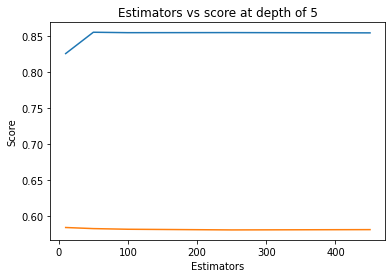

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')  
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

depth =  3 Train Score 0.8044842391104913 test Score 0.5849960791147513
depth =  9 Train Score 0.8864431867653462 test Score 0.5426427525622255
depth =  11 Train Score 0.8971788777513692 test Score 0.554588320638375
depth =  15 Train Score 0.9179740329997295 test Score 0.5420133491816769
depth =  20 Train Score 0.92290073764694 test Score 0.5476928688674083
depth =  35 Train Score 0.9239156038631087 test Score 0.5393155335351867
depth =  50 Train Score 0.9239156038631087 test Score 0.5393155335351867


KeyboardInterrupt: ignored

In [ ]:
print(len(df_final_test))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96320194 0.96319883 0.95507104 0.96087474 0.96691496]
mean train scores [0.96444161 0.96458968 0.95661605 0.96270046 0.96904612]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.8549355308492879
Test f1 score 0.5818695383528997


In [ ]:
import pandas as pd
fl_test = pd.read_csv("/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/timeuser_test_2.csv")
fl_test.head(10)

,userId,followId
0,11644,20497
1,11644,11461
2,11644,12374
3,11644,2799
4,11644,16786
5,11644,16140
6,11644,17877
7,11644,10822
8,11644,21125
9,11644,1916


In [ ]:
user_id = np.asarray(fl_test['userId'])
follow_id = np.asarray(fl_test['followId'])
idd = np.concatenate([user_id, follow_id], axis = 0)
unique_id = np.unique(user_id)
print(len(unique_id), len(user_id), len(follow_id))

2184 10760 10760


In [ ]:
x = set(unique_id).intersection(set(train_graph.nodes))
print(len(x))
ok = []


2040


In [ ]:
del missing_edges

In [ ]:
del adj_matrix

In [ ]:
adj_matrix = np.zeros((24000, 24000), dtype='byte')
for i in tqdm(x):
    src = []
    des = []
    for j in train_graph.nodes:
      if not train_graph.has_edge(i, j) and (i != j):
        src.append(i)
        des.append(j)

    # start_time = time.time()
    df = pd.DataFrame()
    df['source_node'] = src
    df['destination_node'] = des
    df['jaccard_followers'] = df.apply(lambda row: jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
    df['jaccard_followees'] = df.apply(lambda row: jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
    df['cosine_followers'] = df.apply(lambda row: cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
    df['cosine_followees'] = df.apply(lambda row: cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
    df['num_followers_s'], df['num_followers_d'], \
    df['num_followees_s'], df['num_followees_d'], \
    df['inter_followers'], df['inter_followees']= compute_features_stage1(df)
    # print("jaccard cosine numfollow: ", time.time()- start_time)
    # start_time = time.time()
    df['weight_in'] = df.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df['weight_out'] = df.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))
    df['weight_f1'] = df.weight_in + df.weight_out
    df['weight_f2'] = df.weight_in * df.weight_out
    df['weight_f3'] = (2*df.weight_in + 1*df.weight_out)
    df['weight_f4'] = (1*df.weight_in + 2*df.weight_out)
    # print("weight", time.time() - start_time)
    # start_time = time.time()
    df['page_rank_s'] = df.source_node.apply(lambda x:pr.get(x,mean_pr))
    df['page_rank_d'] = df.destination_node.apply(lambda x:pr.get(x,mean_pr))
    # print("page rank: ", time.time() - start_time)
    # start_time = time.time()
    df['katz_s'] = df.source_node.apply(lambda x: katz.get(x,mean_katz))
    df['katz_d'] = df.destination_node.apply(lambda x: katz.get(x,mean_katz))
    # print("katz: ", time.time() - start_time)
    # start_time = time.time()
    df['hubs_s'] = df.source_node.apply(lambda x: hits[0].get(x,0))
    df['hubs_d'] = df.destination_node.apply(lambda x: hits[0].get(x,0))
    # print("hubs", time.time() - start_time)
    # start_time = time.time()
    df['authorities_s'] = df.source_node.apply(lambda x: hits[1].get(x,0))
    df['authorities_d'] = df.destination_node.apply(lambda x: hits[1].get(x,0))
    # print("authorities", time.time() - start_time)
    # start_time = time.time()
    df['follows_back'] = df.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    df['same_comp'] = df.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    df['shortest_path'] = df.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    # print("adar ... ", time.time() - start_time)
    df.drop(['source_node', 'destination_node'],axis=1,inplace=True)
    # print("done")
    # start_time = time.time()
    y_pred = clf.predict(df)
    # print('-- time -- ', time.time() - start_time)
    for k in range(len(y_pred)):
      if y_pred[k] == 1:
        adj_matrix[i][des[k]] = 1
    del src
    del des
    del df

100%|██████████| 2040/2040 [2:32:39<00:00,  4.49s/it]


In [ ]:
np.save("/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/adj_matrix3.npy", adj_matrix)

NameError: ignored

In [ ]:
del am
del recommend_list

In [ ]:
import numpy as np
am = np.load("/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/adj_matrix.npy")
x = np.load("/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/nodes.npy", allow_pickle=True)
print(np.sum(am))

34349038


In [ ]:
a = x.item()
print(len(a))
a = list(a)

2040


In [ ]:
from tqdm import tqdm
recommend_list = {}
for i in tqdm(a):
  nodes = []
  for j in range(am.shape[1]):
    if am[i][j] == 1:
      nodes.append(j)
  recommend_list[i] = nodes


100%|██████████| 2040/2040 [02:55<00:00, 11.61it/s]


In [ ]:
del gt_list
gt_list = {}
for i in a:
  gt_list[i] = []
for i in range(len(user_id)):
  if user_id[i] in a:
    gt_list[user_id[i]].append(follow_id[i])

In [ ]:
print(gt_list[5])

[8987, 19254, 19254, 2169, 15516]


In [ ]:
sum_ap = 0
sum_ar = 0
sum_f1 = 0

for i in a:
  tp = len(set(gt_list[i]).intersection(set(recommend_list[i])))
  tpp = len(recommend_list[i])
  tap = len(gt_list[i])
  sum_ap += tp / (tpp + 0.001)
  sum_ar += tp / (tap + 0.001)
  sum_f1 += 2*tp / (tpp + tap + 0.001)
print("mAP: ", sum_ap / len(a))
print("mAR: ", sum_ar / len(a))
print("mF1: ", sum_f1 / len(a))

mAP:  0.00018106545078446485
mAR:  0.6385612820025334
mF1:  0.00035571555271284835


In [ ]:
np.save("/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2-1/nodes.npy", x)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


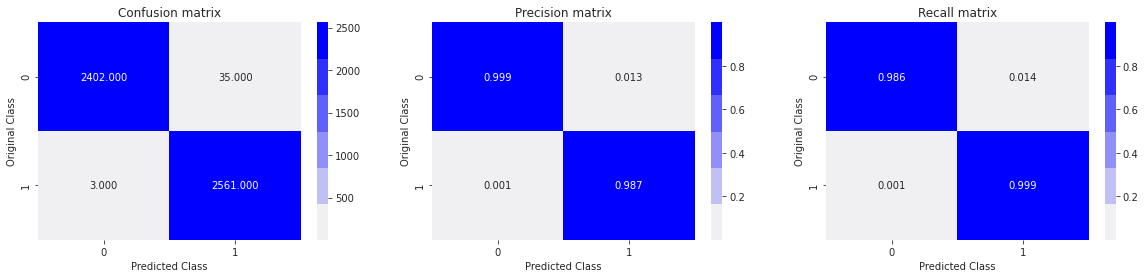

Test confusion_matrix


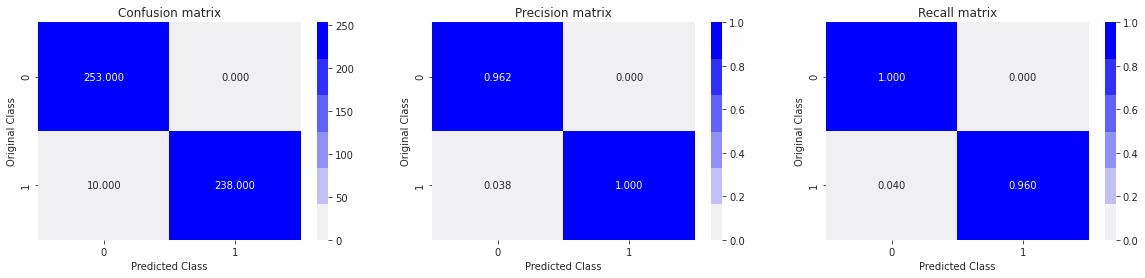

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

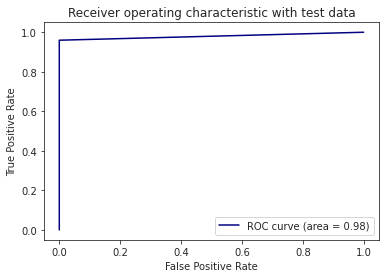

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

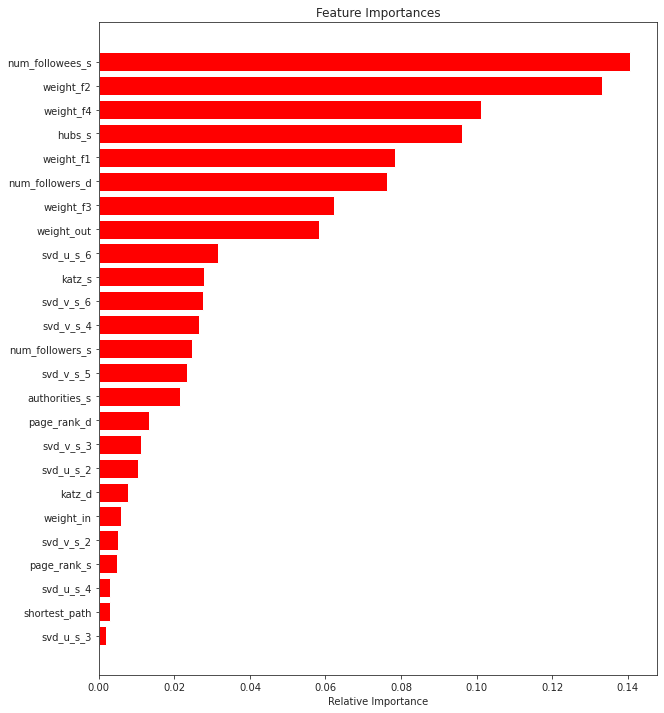

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.0,0.000,0.0,0.000000,22,8,1465,1,0,0,0,1,3,0.333333,0.026481,0.359815,0.008827,0.693148,0.386296,0.000220,0.000070,0.008605,0.008049,5.067459e-02,0.000004,0.000004,3.334750e-05,-7.608481e-01,1.229500e-01,-6.631293e-02,7.259424e-02,5.753351e-01,1.300877e-01,1.590271e-05,-2.793535e-04,4.883429e-04,-3.855620e-05,6.148044e-05,9.964611e-06,0.001377,-0.011267,0.013930,-0.001748,0.001785,0.000329,-0.019488,0.024886,0.019449,0.002320,0.015437,0.003012
1,0.0,0.000,0.0,0.000000,22,2,1709,0,0,0,0,1,3,0.577350,0.024456,0.601806,0.014120,1.179156,0.626262,0.000232,0.000048,0.008617,0.007801,6.098715e-02,0.000000,0.000010,4.294022e-05,5.976715e-01,-6.274673e-02,-3.343122e-01,1.651851e-01,6.635365e-01,1.563240e-01,-2.298663e-19,1.513537e-18,9.873572e-19,2.094905e-19,-1.388591e-18,-1.287533e-18,0.002020,-0.014281,0.024214,-0.001988,0.003796,0.000916,-0.005625,0.002001,-0.012092,0.006990,0.025223,0.003897
2,0.0,0.000,0.0,0.000000,23,1,58,0,0,0,0,0,-1,1.000000,0.131306,1.131306,0.131306,2.131306,1.262613,0.000079,0.000049,0.008685,0.007759,4.853548e-04,0.000000,0.000040,1.866462e-07,2.958226e-03,-1.618158e-02,1.976343e-02,-9.154458e-04,2.828590e-03,1.238787e-03,7.055563e-19,-4.705217e-18,-2.930285e-18,-6.399989e-19,4.204582e-18,3.952745e-18,0.004101,-0.065306,0.070569,-0.007001,0.015112,0.003603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000,0.0,0.000000,0,1,1,0,0,0,0,0,-1,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000048,0.000089,0.007715,0.007754,2.300145e-95,0.000000,0.000000,5.042016e-95,5.046352e-19,-3.242280e-18,-2.079669e-18,-4.637662e-19,2.974537e-18,2.765869e-18,-8.323954e-19,4.855538e-18,3.084476e-18,6.966603e-19,-4.361661e-18,-4.103225e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.125,0.0,0.353553,3,179,8,1,0,1,0,0,-1,0.075593,0.377964,0.453557,0.028571,0.529150,0.831522,0.000049,0.015818,0.007844,0.014813,2.348675e-04,0.000079,0.000024,1.738262e-04,1.110990e-04,-7.620537e-04,5.169073e-04,1.518575e-04,-1.137993e-04,3.831645e-04,1.208045e-04,-8.823778e-04,6.203157e-04,9.555117e-06,-5.888917e-05,1.958227e-04,0.009366,0.025166,0.032194,0.000369,0.006404,0.002127,0.003505,-0.026542,0.020553,0.000325,-0.002892,0.014393


In [ ]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.0,0.0,0.0,0.0,31,10,531,0,0,0,0,1,3,0.316228,0.044151,0.360379,0.013962,0.676607,0.404530,0.000328,0.000091,0.008966,0.008150,0.014646,0.0,0.000003,0.000256,0.008634,0.044946,-0.037777,-0.073106,0.102433,0.037262,-7.585189e-19,4.898633e-18,3.090889e-18,7.457790e-19,-4.519411e-18,-4.147289e-18,0.000837,-0.011251,0.012590,-0.001522,0.001632,0.000314,0.001163,0.028023,0.016566,-0.024218,0.033258,0.021811
1,0.0,0.0,0.0,0.0,78,0,1237,0,0,0,0,0,-1,0.698555,0.029013,0.727568,0.020267,1.426123,0.756581,0.001306,0.000061,0.010825,0.007795,0.044376,0.0,0.000024,0.000000,0.060626,0.042693,-0.089316,-0.954827,0.103645,0.110942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.003601,-0.030209,0.041117,-0.001908,0.009303,0.002183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,14,5,112,0,0,0,0,1,2,0.408248,0.094916,0.503164,0.038749,0.911412,0.598080,0.000083,0.000053,0.008306,0.007928,0.002016,0.0,0.000034,0.000008,0.005245,-0.073381,0.067040,-0.008519,0.017484,0.005193,1.141380e-19,-7.340343e-19,-4.484734e-19,-1.075472e-19,6.800434e-19,6.292777e-19,0.008654,0.004518,0.039862,-0.002704,0.011141,0.003051,0.000832,-0.007919,0.016414,-0.001234,0.002873,0.000709
3,0.0,0.0,0.0,0.0,2,172,4,0,0,0,0,1,-1,0.078326,0.500000,0.578326,0.039163,0.656652,1.078326,0.000049,0.004733,0.007803,0.014468,0.000014,0.0,0.000025,0.000174,0.000137,-0.000934,0.001012,-0.000039,0.000181,0.000035,-5.916530e-19,3.561905e-18,2.172809e-18,4.469719e-19,-3.192520e-18,-3.022185e-18,-0.025929,0.005582,-0.003142,-0.000015,0.013799,0.002277,0.002689,-0.029608,0.023745,-0.000652,-0.002230,0.014359
4,0.0,0.0,0.0,0.0,25,0,5469,0,0,0,0,0,-1,0.698555,0.013933,0.712488,0.009733,1.411044,0.726422,0.000335,0.000061,0.008766,0.007795,0.411493,0.0,0.000012,0.000000,-0.019263,-0.021237,-0.040757,0.083445,-0.261199,0.959561,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.002240,-0.018220,0.027773,-0.002363,0.004851,0.001085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
train_graph=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist('/content/drive/MyDrive/RS_linkprediction/Dao_test/8-2/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)


In [ ]:
from tqdm import tqdm
def compute_features_stage1(df,graph):
  num_followers_s =[]
  num_followees_s =[]
  num_followers_d =[]
  num_followees_d = []
  inter_followers= []
  inter_followees =[]
  for i,row in tqdm(df.iterrows()):
    try:
      s1 = set(graph.predecessors(row['source_node']))
      s2 = set(graph.successors(row['source_node']))
    except:
      s1 = set()
      s2 = set()
    try: 
      d1 = set(graph.predecessors(row["destination_node"]))
      d2 = set(graph.successors(row['destination_node']))
    except:
      d1 = set()
      d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))

    inter_followees.append(len(s1.intersection(d1)))
    inter_followers.append(len(s2.intersection(d2)))

  return num_followers_d,num_followees_d,num_followers_s,num_followees_s,inter_followers,inter_followees       


In [ ]:
train_num_followers_d,train_num_followees_d,train_num_followers_s,train_num_followees_s,train_inter_followers,train_inter_followees = compute_features_stage1(df_final_train,train_graph)
test_num_followers_d,test_num_followees_d,test_num_followers_s,test_num_followees_s,test_inter_followers,test_inter_followees = compute_features_stage1(df_final_test,test_graph)

5001it [00:00, 14095.18it/s]
501it [00:00, 13568.01it/s]


In [ ]:
len(train_num_followers_d)

5001

In [ ]:
len(test_num_followers_d)

501

In [ ]:
df_final_train["num_followers_d"] = train_num_followers_d
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.0,0.000,0.0,0.000000,22,0,1465,1,0,0,0,1,3,0.333333,0.026481,0.359815,0.008827,0.693148,0.386296,0.000220,0.000070,0.008605,0.008049,5.067459e-02,0.000004,0.000004,3.334750e-05,-7.608481e-01,1.229500e-01,-6.631293e-02,7.259424e-02,5.753351e-01,1.300877e-01,1.590271e-05,-2.793535e-04,4.883429e-04,-3.855620e-05,6.148044e-05,9.964611e-06,0.001377,-0.011267,0.013930,-0.001748,0.001785,0.000329,-0.019488,0.024886,0.019449,0.002320,0.015437,0.003012
1,0.0,0.000,0.0,0.000000,22,0,1709,0,0,0,0,1,3,0.577350,0.024456,0.601806,0.014120,1.179156,0.626262,0.000232,0.000048,0.008617,0.007801,6.098715e-02,0.000000,0.000010,4.294022e-05,5.976715e-01,-6.274673e-02,-3.343122e-01,1.651851e-01,6.635365e-01,1.563240e-01,-2.298663e-19,1.513537e-18,9.873572e-19,2.094905e-19,-1.388591e-18,-1.287533e-18,0.002020,-0.014281,0.024214,-0.001988,0.003796,0.000916,-0.005625,0.002001,-0.012092,0.006990,0.025223,0.003897
2,0.0,0.000,0.0,0.000000,23,0,58,0,0,0,0,0,-1,1.000000,0.131306,1.131306,0.131306,2.131306,1.262613,0.000079,0.000049,0.008685,0.007759,4.853548e-04,0.000000,0.000040,1.866462e-07,2.958226e-03,-1.618158e-02,1.976343e-02,-9.154458e-04,2.828590e-03,1.238787e-03,7.055563e-19,-4.705217e-18,-2.930285e-18,-6.399989e-19,4.204582e-18,3.952745e-18,0.004101,-0.065306,0.070569,-0.007001,0.015112,0.003603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000,0.0,0.000000,0,0,1,0,0,0,0,0,-1,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000048,0.000089,0.007715,0.007754,2.300145e-95,0.000000,0.000000,5.042016e-95,5.046352e-19,-3.242280e-18,-2.079669e-18,-4.637662e-19,2.974537e-18,2.765869e-18,-8.323954e-19,4.855538e-18,3.084476e-18,6.966603e-19,-4.361661e-18,-4.103225e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.125,0.0,0.353553,3,0,8,1,0,1,0,0,-1,0.075593,0.377964,0.453557,0.028571,0.529150,0.831522,0.000049,0.015818,0.007844,0.014813,2.348675e-04,0.000079,0.000024,1.738262e-04,1.110990e-04,-7.620537e-04,5.169073e-04,1.518575e-04,-1.137993e-04,3.831645e-04,1.208045e-04,-8.823778e-04,6.203157e-04,9.555117e-06,-5.888917e-05,1.958227e-04,0.009366,0.025166,0.032194,0.000369,0.006404,0.002127,0.003505,-0.026542,0.020553,0.000325,-0.002892,0.014393


In [ ]:
df_final_test['num_followers_d'] = test_num_followees_d
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0.0,0.0,0.0,0.0,31,0,531,0,0,0,0,1,3,0.316228,0.044151,0.360379,0.013962,0.676607,0.404530,0.000328,0.000091,0.008966,0.008150,0.014646,0.0,0.000003,0.000256,0.008634,0.044946,-0.037777,-0.073106,0.102433,0.037262,-7.585189e-19,4.898633e-18,3.090889e-18,7.457790e-19,-4.519411e-18,-4.147289e-18,0.000837,-0.011251,0.012590,-0.001522,0.001632,0.000314,0.001163,0.028023,0.016566,-0.024218,0.033258,0.021811
1,0.0,0.0,0.0,0.0,78,0,1237,0,0,0,0,0,-1,0.698555,0.029013,0.727568,0.020267,1.426123,0.756581,0.001306,0.000061,0.010825,0.007795,0.044376,0.0,0.000024,0.000000,0.060626,0.042693,-0.089316,-0.954827,0.103645,0.110942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.003601,-0.030209,0.041117,-0.001908,0.009303,0.002183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,14,0,112,0,0,0,0,1,2,0.408248,0.094916,0.503164,0.038749,0.911412,0.598080,0.000083,0.000053,0.008306,0.007928,0.002016,0.0,0.000034,0.000008,0.005245,-0.073381,0.067040,-0.008519,0.017484,0.005193,1.141380e-19,-7.340343e-19,-4.484734e-19,-1.075472e-19,6.800434e-19,6.292777e-19,0.008654,0.004518,0.039862,-0.002704,0.011141,0.003051,0.000832,-0.007919,0.016414,-0.001234,0.002873,0.000709
3,0.0,0.0,0.0,0.0,2,0,4,0,0,0,0,1,-1,0.078326,0.500000,0.578326,0.039163,0.656652,1.078326,0.000049,0.004733,0.007803,0.014468,0.000014,0.0,0.000025,0.000174,0.000137,-0.000934,0.001012,-0.000039,0.000181,0.000035,-5.916530e-19,3.561905e-18,2.172809e-18,4.469719e-19,-3.192520e-18,-3.022185e-18,-0.025929,0.005582,-0.003142,-0.000015,0.013799,0.002277,0.002689,-0.029608,0.023745,-0.000652,-0.002230,0.014359
4,0.0,0.0,0.0,0.0,25,0,5469,0,0,0,0,0,-1,0.698555,0.013933,0.712488,0.009733,1.411044,0.726422,0.000335,0.000061,0.008766,0.007795,0.411493,0.0,0.000012,0.000000,-0.019263,-0.021237,-0.040757,0.083445,-0.261199,0.959561,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.002240,-0.018220,0.027773,-0.002363,0.004851,0.001085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
source = np.array(df_final_train["num_followers_s"])
destination = np.array(df_final_train["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_train["followers_preferential_attach"]  = followers_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0.0,0.000,0.0,0.000000,22,0,1465,1,0,0,0,1,3,0.333333,0.026481,0.359815,0.008827,0.693148,0.386296,0.000220,0.000070,0.008605,0.008049,5.067459e-02,0.000004,0.000004,3.334750e-05,-7.608481e-01,1.229500e-01,-6.631293e-02,7.259424e-02,5.753351e-01,1.300877e-01,1.590271e-05,-2.793535e-04,4.883429e-04,-3.855620e-05,6.148044e-05,9.964611e-06,0.001377,-0.011267,0.013930,-0.001748,0.001785,0.000329,-0.019488,0.024886,0.019449,0.002320,0.015437,0.003012,0
1,0.0,0.000,0.0,0.000000,22,0,1709,0,0,0,0,1,3,0.577350,0.024456,0.601806,0.014120,1.179156,0.626262,0.000232,0.000048,0.008617,0.007801,6.098715e-02,0.000000,0.000010,4.294022e-05,5.976715e-01,-6.274673e-02,-3.343122e-01,1.651851e-01,6.635365e-01,1.563240e-01,-2.298663e-19,1.513537e-18,9.873572e-19,2.094905e-19,-1.388591e-18,-1.287533e-18,0.002020,-0.014281,0.024214,-0.001988,0.003796,0.000916,-0.005625,0.002001,-0.012092,0.006990,0.025223,0.003897,0
2,0.0,0.000,0.0,0.000000,23,0,58,0,0,0,0,0,-1,1.000000,0.131306,1.131306,0.131306,2.131306,1.262613,0.000079,0.000049,0.008685,0.007759,4.853548e-04,0.000000,0.000040,1.866462e-07,2.958226e-03,-1.618158e-02,1.976343e-02,-9.154458e-04,2.828590e-03,1.238787e-03,7.055563e-19,-4.705217e-18,-2.930285e-18,-6.399989e-19,4.204582e-18,3.952745e-18,0.004101,-0.065306,0.070569,-0.007001,0.015112,0.003603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.0,0.000,0.0,0.000000,0,0,1,0,0,0,0,0,-1,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000048,0.000089,0.007715,0.007754,2.300145e-95,0.000000,0.000000,5.042016e-95,5.046352e-19,-3.242280e-18,-2.079669e-18,-4.637662e-19,2.974537e-18,2.765869e-18,-8.323954e-19,4.855538e-18,3.084476e-18,6.966603e-19,-4.361661e-18,-4.103225e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.0,0.125,0.0,0.353553,3,0,8,1,0,1,0,0,-1,0.075593,0.377964,0.453557,0.028571,0.529150,0.831522,0.000049,0.015818,0.007844,0.014813,2.348675e-04,0.000079,0.000024,1.738262e-04,1.110990e-04,-7.620537e-04,5.169073e-04,1.518575e-04,-1.137993e-04,3.831645e-04,1.208045e-04,-8.823778e-04,6.203157e-04,9.555117e-06,-5.888917e-05,1.958227e-04,0.009366,0.025166,0.032194,0.000369,0.006404,0.002127,0.003505,-0.026542,0.020553,0.000325,-0.002892,0.014393,0


In [ ]:
source = np.array(df_final_train["num_followees_s"])
destination = np.array(df_final_train["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_train["followees_preferential_attach"]  = followees_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0.0,0.000,0.0,0.000000,22,0,1465,1,0,0,0,1,3,0.333333,0.026481,0.359815,0.008827,0.693148,0.386296,0.000220,0.000070,0.008605,0.008049,5.067459e-02,0.000004,0.000004,3.334750e-05,-7.608481e-01,1.229500e-01,-6.631293e-02,7.259424e-02,5.753351e-01,1.300877e-01,1.590271e-05,-2.793535e-04,4.883429e-04,-3.855620e-05,6.148044e-05,9.964611e-06,0.001377,-0.011267,0.013930,-0.001748,0.001785,0.000329,-0.019488,0.024886,0.019449,0.002320,0.015437,0.003012,0,2146225
1,0.0,0.000,0.0,0.000000,22,0,1709,0,0,0,0,1,3,0.577350,0.024456,0.601806,0.014120,1.179156,0.626262,0.000232,0.000048,0.008617,0.007801,6.098715e-02,0.000000,0.000010,4.294022e-05,5.976715e-01,-6.274673e-02,-3.343122e-01,1.651851e-01,6.635365e-01,1.563240e-01,-2.298663e-19,1.513537e-18,9.873572e-19,2.094905e-19,-1.388591e-18,-1.287533e-18,0.002020,-0.014281,0.024214,-0.001988,0.003796,0.000916,-0.005625,0.002001,-0.012092,0.006990,0.025223,0.003897,0,2920681
2,0.0,0.000,0.0,0.000000,23,0,58,0,0,0,0,0,-1,1.000000,0.131306,1.131306,0.131306,2.131306,1.262613,0.000079,0.000049,0.008685,0.007759,4.853548e-04,0.000000,0.000040,1.866462e-07,2.958226e-03,-1.618158e-02,1.976343e-02,-9.154458e-04,2.828590e-03,1.238787e-03,7.055563e-19,-4.705217e-18,-2.930285e-18,-6.399989e-19,4.204582e-18,3.952745e-18,0.004101,-0.065306,0.070569,-0.007001,0.015112,0.003603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,3364
3,0.0,0.000,0.0,0.000000,0,0,1,0,0,0,0,0,-1,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000048,0.000089,0.007715,0.007754,2.300145e-95,0.000000,0.000000,5.042016e-95,5.046352e-19,-3.242280e-18,-2.079669e-18,-4.637662e-19,2.974537e-18,2.765869e-18,-8.323954e-19,4.855538e-18,3.084476e-18,6.966603e-19,-4.361661e-18,-4.103225e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
4,0.0,0.125,0.0,0.353553,3,0,8,1,0,1,0,0,-1,0.075593,0.377964,0.453557,0.028571,0.529150,0.831522,0.000049,0.015818,0.007844,0.014813,2.348675e-04,0.000079,0.000024,1.738262e-04,1.110990e-04,-7.620537e-04,5.169073e-04,1.518575e-04,-1.137993e-04,3.831645e-04,1.208045e-04,-8.823778e-04,6.203157e-04,9.555117e-06,-5.888917e-05,1.958227e-04,0.009366,0.025166,0.032194,0.000369,0.006404,0.002127,0.003505,-0.026542,0.020553,0.000325,-0.002892,0.014393,0,64


In [ ]:
source = np.array(df_final_test["num_followers_s"])
destination = np.array(df_final_test["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_test["followers_preferential_attach"]  = followers_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0.0,0.0,0.0,0.0,31,0,531,0,0,0,0,1,3,0.316228,0.044151,0.360379,0.013962,0.676607,0.404530,0.000328,0.000091,0.008966,0.008150,0.014646,0.0,0.000003,0.000256,0.008634,0.044946,-0.037777,-0.073106,0.102433,0.037262,-7.585189e-19,4.898633e-18,3.090889e-18,7.457790e-19,-4.519411e-18,-4.147289e-18,0.000837,-0.011251,0.012590,-0.001522,0.001632,0.000314,0.001163,0.028023,0.016566,-0.024218,0.033258,0.021811,0
1,0.0,0.0,0.0,0.0,78,0,1237,0,0,0,0,0,-1,0.698555,0.029013,0.727568,0.020267,1.426123,0.756581,0.001306,0.000061,0.010825,0.007795,0.044376,0.0,0.000024,0.000000,0.060626,0.042693,-0.089316,-0.954827,0.103645,0.110942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.003601,-0.030209,0.041117,-0.001908,0.009303,0.002183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.0,0.0,0.0,0.0,14,0,112,0,0,0,0,1,2,0.408248,0.094916,0.503164,0.038749,0.911412,0.598080,0.000083,0.000053,0.008306,0.007928,0.002016,0.0,0.000034,0.000008,0.005245,-0.073381,0.067040,-0.008519,0.017484,0.005193,1.141380e-19,-7.340343e-19,-4.484734e-19,-1.075472e-19,6.800434e-19,6.292777e-19,0.008654,0.004518,0.039862,-0.002704,0.011141,0.003051,0.000832,-0.007919,0.016414,-0.001234,0.002873,0.000709,0
3,0.0,0.0,0.0,0.0,2,0,4,0,0,0,0,1,-1,0.078326,0.500000,0.578326,0.039163,0.656652,1.078326,0.000049,0.004733,0.007803,0.014468,0.000014,0.0,0.000025,0.000174,0.000137,-0.000934,0.001012,-0.000039,0.000181,0.000035,-5.916530e-19,3.561905e-18,2.172809e-18,4.469719e-19,-3.192520e-18,-3.022185e-18,-0.025929,0.005582,-0.003142,-0.000015,0.013799,0.002277,0.002689,-0.029608,0.023745,-0.000652,-0.002230,0.014359,0
4,0.0,0.0,0.0,0.0,25,0,5469,0,0,0,0,0,-1,0.698555,0.013933,0.712488,0.009733,1.411044,0.726422,0.000335,0.000061,0.008766,0.007795,0.411493,0.0,0.000012,0.000000,-0.019263,-0.021237,-0.040757,0.083445,-0.261199,0.959561,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.002240,-0.018220,0.027773,-0.002363,0.004851,0.001085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [ ]:
source = np.array(df_final_test["num_followees_s"])
destination = np.array(df_final_test["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_test["followees_preferential_attach"]  = followees_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0.0,0.0,0.0,0.0,31,0,531,0,0,0,0,1,3,0.316228,0.044151,0.360379,0.013962,0.676607,0.404530,0.000328,0.000091,0.008966,0.008150,0.014646,0.0,0.000003,0.000256,0.008634,0.044946,-0.037777,-0.073106,0.102433,0.037262,-7.585189e-19,4.898633e-18,3.090889e-18,7.457790e-19,-4.519411e-18,-4.147289e-18,0.000837,-0.011251,0.012590,-0.001522,0.001632,0.000314,0.001163,0.028023,0.016566,-0.024218,0.033258,0.021811,0,281961
1,0.0,0.0,0.0,0.0,78,0,1237,0,0,0,0,0,-1,0.698555,0.029013,0.727568,0.020267,1.426123,0.756581,0.001306,0.000061,0.010825,0.007795,0.044376,0.0,0.000024,0.000000,0.060626,0.042693,-0.089316,-0.954827,0.103645,0.110942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.003601,-0.030209,0.041117,-0.001908,0.009303,0.002183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1530169
2,0.0,0.0,0.0,0.0,14,0,112,0,0,0,0,1,2,0.408248,0.094916,0.503164,0.038749,0.911412,0.598080,0.000083,0.000053,0.008306,0.007928,0.002016,0.0,0.000034,0.000008,0.005245,-0.073381,0.067040,-0.008519,0.017484,0.005193,1.141380e-19,-7.340343e-19,-4.484734e-19,-1.075472e-19,6.800434e-19,6.292777e-19,0.008654,0.004518,0.039862,-0.002704,0.011141,0.003051,0.000832,-0.007919,0.016414,-0.001234,0.002873,0.000709,0,12544
3,0.0,0.0,0.0,0.0,2,0,4,0,0,0,0,1,-1,0.078326,0.500000,0.578326,0.039163,0.656652,1.078326,0.000049,0.004733,0.007803,0.014468,0.000014,0.0,0.000025,0.000174,0.000137,-0.000934,0.001012,-0.000039,0.000181,0.000035,-5.916530e-19,3.561905e-18,2.172809e-18,4.469719e-19,-3.192520e-18,-3.022185e-18,-0.025929,0.005582,-0.003142,-0.000015,0.013799,0.002277,0.002689,-0.029608,0.023745,-0.000652,-0.002230,0.014359,0,16
4,0.0,0.0,0.0,0.0,25,0,5469,0,0,0,0,0,-1,0.698555,0.013933,0.712488,0.009733,1.411044,0.726422,0.000335,0.000061,0.008766,0.007795,0.411493,0.0,0.000012,0.000000,-0.019263,-0.021237,-0.040757,0.083445,-0.261199,0.959561,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.002240,-0.018220,0.027773,-0.002363,0.004851,0.001085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,29909961


In [ ]:
sorted(df_final_train.columns)

['authorities_d',
 'authorities_s',
 'cosine_followees',
 'cosine_followers',
 'followees_preferential_attach',
 'followers_preferential_attach',
 'follows_back',
 'hubs_d',
 'hubs_s',
 'inter_followees',
 'inter_followers',
 'jaccard_followees',
 'jaccard_followers',
 'katz_d',
 'katz_s',
 'num_followees_d',
 'num_followees_s',
 'num_followers_d',
 'num_followers_s',
 'page_rank_d',
 'page_rank_s',
 'same_comp',
 'shortest_path',
 'svd_u_d_1',
 'svd_u_d_2',
 'svd_u_d_3',
 'svd_u_d_4',
 'svd_u_d_5',
 'svd_u_d_6',
 'svd_u_s_1',
 'svd_u_s_2',
 'svd_u_s_3',
 'svd_u_s_4',
 'svd_u_s_5',
 'svd_u_s_6',
 'svd_v_d_1',
 'svd_v_d_2',
 'svd_v_d_3',
 'svd_v_d_4',
 'svd_v_d_5',
 'svd_v_d_6',
 'svd_v_s_1',
 'svd_v_s_2',
 'svd_v_s_3',
 'svd_v_s_4',
 'svd_v_s_5',
 'svd_v_s_6',
 'weight_f1',
 'weight_f2',
 'weight_f3',
 'weight_f4',
 'weight_in',
 'weight_out']

In [ ]:
svd_dot_U =[]
range_value = len(np.array(df_final_train["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_train["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_train["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))
  

In [ ]:
df_final_train["svd_dot_U"] = svd_dot_U
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0.0,0.000,0.0,0.000000,22,0,1465,1,0,0,0,1,3,0.333333,0.026481,0.359815,0.008827,0.693148,0.386296,0.000220,0.000070,0.008605,0.008049,5.067459e-02,0.000004,0.000004,3.334750e-05,-7.608481e-01,1.229500e-01,-6.631293e-02,7.259424e-02,5.753351e-01,1.300877e-01,1.590271e-05,-2.793535e-04,4.883429e-04,-3.855620e-05,6.148044e-05,9.964611e-06,0.001377,-0.011267,0.013930,-0.001748,0.001785,0.000329,-0.019488,0.024886,0.019449,0.002320,0.015437,0.003012,0,2146225,-4.496034e-05
1,0.0,0.000,0.0,0.000000,22,0,1709,0,0,0,0,1,3,0.577350,0.024456,0.601806,0.014120,1.179156,0.626262,0.000232,0.000048,0.008617,0.007801,6.098715e-02,0.000000,0.000010,4.294022e-05,5.976715e-01,-6.274673e-02,-3.343122e-01,1.651851e-01,6.635365e-01,1.563240e-01,-2.298663e-19,1.513537e-18,9.873572e-19,2.094905e-19,-1.388591e-18,-1.287533e-18,0.002020,-0.014281,0.024214,-0.001988,0.003796,0.000916,-0.005625,0.002001,-0.012092,0.006990,0.025223,0.003897,0,2920681,-1.650488e-18
2,0.0,0.000,0.0,0.000000,23,0,58,0,0,0,0,0,-1,1.000000,0.131306,1.131306,0.131306,2.131306,1.262613,0.000079,0.000049,0.008685,0.007759,4.853548e-04,0.000000,0.000040,1.866462e-07,2.958226e-03,-1.618158e-02,1.976343e-02,-9.154458e-04,2.828590e-03,1.238787e-03,7.055563e-19,-4.705217e-18,-2.930285e-18,-6.399989e-19,4.204582e-18,3.952745e-18,0.004101,-0.065306,0.070569,-0.007001,0.015112,0.003603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,3364,3.768808e-20
3,0.0,0.000,0.0,0.000000,0,0,1,0,0,0,0,0,-1,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000048,0.000089,0.007715,0.007754,2.300145e-95,0.000000,0.000000,5.042016e-95,5.046352e-19,-3.242280e-18,-2.079669e-18,-4.637662e-19,2.974537e-18,2.765869e-18,-8.323954e-19,4.855538e-18,3.084476e-18,6.966603e-19,-4.361661e-18,-4.103225e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,-4.722376e-35
4,0.0,0.125,0.0,0.353553,3,0,8,1,0,1,0,0,-1,0.075593,0.377964,0.453557,0.028571,0.529150,0.831522,0.000049,0.015818,0.007844,0.014813,2.348675e-04,0.000079,0.000024,1.738262e-04,1.110990e-04,-7.620537e-04,5.169073e-04,1.518575e-04,-1.137993e-04,3.831645e-04,1.208045e-04,-8.823778e-04,6.203157e-04,9.555117e-06,-5.888917e-05,1.958227e-04,0.009366,0.025166,0.032194,0.000369,0.006404,0.002127,0.003505,-0.026542,0.020553,0.000325,-0.002892,0.014393,0,64,1.089671e-06


In [ ]:
svd_dot_V = []
range_value = len(np.array(df_final_train["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_train["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_train["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [ ]:
df_final_train["svd_dot_V"] = svd_dot_V
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0.0,0.000,0.0,0.000000,22,0,1465,1,0,0,0,1,3,0.333333,0.026481,0.359815,0.008827,0.693148,0.386296,0.000220,0.000070,0.008605,0.008049,5.067459e-02,0.000004,0.000004,3.334750e-05,-7.608481e-01,1.229500e-01,-6.631293e-02,7.259424e-02,5.753351e-01,1.300877e-01,1.590271e-05,-2.793535e-04,4.883429e-04,-3.855620e-05,6.148044e-05,9.964611e-06,0.001377,-0.011267,0.013930,-0.001748,0.001785,0.000329,-0.019488,0.024886,0.019449,0.002320,0.015437,0.003012,0,2146225,-4.496034e-05,-0.000012
1,0.0,0.000,0.0,0.000000,22,0,1709,0,0,0,0,1,3,0.577350,0.024456,0.601806,0.014120,1.179156,0.626262,0.000232,0.000048,0.008617,0.007801,6.098715e-02,0.000000,0.000010,4.294022e-05,5.976715e-01,-6.274673e-02,-3.343122e-01,1.651851e-01,6.635365e-01,1.563240e-01,-2.298663e-19,1.513537e-18,9.873572e-19,2.094905e-19,-1.388591e-18,-1.287533e-18,0.002020,-0.014281,0.024214,-0.001988,0.003796,0.000916,-0.005625,0.002001,-0.012092,0.006990,0.025223,0.003897,0,2920681,-1.650488e-18,-0.000247
2,0.0,0.000,0.0,0.000000,23,0,58,0,0,0,0,0,-1,1.000000,0.131306,1.131306,0.131306,2.131306,1.262613,0.000079,0.000049,0.008685,0.007759,4.853548e-04,0.000000,0.000040,1.866462e-07,2.958226e-03,-1.618158e-02,1.976343e-02,-9.154458e-04,2.828590e-03,1.238787e-03,7.055563e-19,-4.705217e-18,-2.930285e-18,-6.399989e-19,4.204582e-18,3.952745e-18,0.004101,-0.065306,0.070569,-0.007001,0.015112,0.003603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,3364,3.768808e-20,0.000000
3,0.0,0.000,0.0,0.000000,0,0,1,0,0,0,0,0,-1,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000048,0.000089,0.007715,0.007754,2.300145e-95,0.000000,0.000000,5.042016e-95,5.046352e-19,-3.242280e-18,-2.079669e-18,-4.637662e-19,2.974537e-18,2.765869e-18,-8.323954e-19,4.855538e-18,3.084476e-18,6.966603e-19,-4.361661e-18,-4.103225e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,-4.722376e-35,0.000000
4,0.0,0.125,0.0,0.353553,3,0,8,1,0,1,0,0,-1,0.075593,0.377964,0.453557,0.028571,0.529150,0.831522,0.000049,0.015818,0.007844,0.014813,2.348675e-04,0.000079,0.000024,1.738262e-04,1.110990e-04,-7.620537e-04,5.169073e-04,1.518575e-04,-1.137993e-04,3.831645e-04,1.208045e-04,-8.823778e-04,6.203157e-04,9.555117e-06,-5.888917e-05,1.958227e-04,0.009366,0.025166,0.032194,0.000369,0.006404,0.002127,0.003505,-0.026542,0.020553,0.000325,-0.002892,0.014393,0,64,1.089671e-06,0.000039


In [ ]:
svd_dot_U =[]
range_value = len(np.array(df_final_test["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_test["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_test["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))
  

In [ ]:
df_final_test["svd_dot_U"] = svd_dot_U
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0.0,0.0,0.0,0.0,31,0,531,0,0,0,0,1,3,0.316228,0.044151,0.360379,0.013962,0.676607,0.404530,0.000328,0.000091,0.008966,0.008150,0.014646,0.0,0.000003,0.000256,0.008634,0.044946,-0.037777,-0.073106,0.102433,0.037262,-7.585189e-19,4.898633e-18,3.090889e-18,7.457790e-19,-4.519411e-18,-4.147289e-18,0.000837,-0.011251,0.012590,-0.001522,0.001632,0.000314,0.001163,0.028023,0.016566,-0.024218,0.033258,0.021811,0,281961,-5.751316e-19
1,0.0,0.0,0.0,0.0,78,0,1237,0,0,0,0,0,-1,0.698555,0.029013,0.727568,0.020267,1.426123,0.756581,0.001306,0.000061,0.010825,0.007795,0.044376,0.0,0.000024,0.000000,0.060626,0.042693,-0.089316,-0.954827,0.103645,0.110942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.003601,-0.030209,0.041117,-0.001908,0.009303,0.002183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1530169,0.000000e+00
2,0.0,0.0,0.0,0.0,14,0,112,0,0,0,0,1,2,0.408248,0.094916,0.503164,0.038749,0.911412,0.598080,0.000083,0.000053,0.008306,0.007928,0.002016,0.0,0.000034,0.000008,0.005245,-0.073381,0.067040,-0.008519,0.017484,0.005193,1.141380e-19,-7.340343e-19,-4.484734e-19,-1.075472e-19,6.800434e-19,6.292777e-19,0.008654,0.004518,0.039862,-0.002704,0.011141,0.003051,0.000832,-0.007919,0.016414,-0.001234,0.002873,0.000709,0,12544,4.047099e-20
3,0.0,0.0,0.0,0.0,2,0,4,0,0,0,0,1,-1,0.078326,0.500000,0.578326,0.039163,0.656652,1.078326,0.000049,0.004733,0.007803,0.014468,0.000014,0.0,0.000025,0.000174,0.000137,-0.000934,0.001012,-0.000039,0.000181,0.000035,-5.916530e-19,3.561905e-18,2.172809e-18,4.469719e-19,-3.192520e-18,-3.022185e-18,-0.025929,0.005582,-0.003142,-0.000015,0.013799,0.002277,0.002689,-0.029608,0.023745,-0.000652,-0.002230,0.014359,0,16,-1.905270e-21
4,0.0,0.0,0.0,0.0,25,0,5469,0,0,0,0,0,-1,0.698555,0.013933,0.712488,0.009733,1.411044,0.726422,0.000335,0.000061,0.008766,0.007795,0.411493,0.0,0.000012,0.000000,-0.019263,-0.021237,-0.040757,0.083445,-0.261199,0.959561,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.002240,-0.018220,0.027773,-0.002363,0.004851,0.001085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,29909961,0.000000e+00


In [ ]:
svd_dot_V = []
range_value = len(np.array(df_final_test["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_test["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_test["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [ ]:
df_final_test["svd_dot_V"] = svd_dot_V
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0.0,0.0,0.0,0.0,31,0,531,0,0,0,0,1,3,0.316228,0.044151,0.360379,0.013962,0.676607,0.404530,0.000328,0.000091,0.008966,0.008150,0.014646,0.0,0.000003,0.000256,0.008634,0.044946,-0.037777,-0.073106,0.102433,0.037262,-7.585189e-19,4.898633e-18,3.090889e-18,7.457790e-19,-4.519411e-18,-4.147289e-18,0.000837,-0.011251,0.012590,-0.001522,0.001632,0.000314,0.001163,0.028023,0.016566,-0.024218,0.033258,0.021811,0,281961,-5.751316e-19,-0.000008
1,0.0,0.0,0.0,0.0,78,0,1237,0,0,0,0,0,-1,0.698555,0.029013,0.727568,0.020267,1.426123,0.756581,0.001306,0.000061,0.010825,0.007795,0.044376,0.0,0.000024,0.000000,0.060626,0.042693,-0.089316,-0.954827,0.103645,0.110942,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.003601,-0.030209,0.041117,-0.001908,0.009303,0.002183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1530169,0.000000e+00,0.000000
2,0.0,0.0,0.0,0.0,14,0,112,0,0,0,0,1,2,0.408248,0.094916,0.503164,0.038749,0.911412,0.598080,0.000083,0.000053,0.008306,0.007928,0.002016,0.0,0.000034,0.000008,0.005245,-0.073381,0.067040,-0.008519,0.017484,0.005193,1.141380e-19,-7.340343e-19,-4.484734e-19,-1.075472e-19,6.800434e-19,6.292777e-19,0.008654,0.004518,0.039862,-0.002704,0.011141,0.003051,0.000832,-0.007919,0.016414,-0.001234,0.002873,0.000709,0,12544,4.047099e-20,0.000663
3,0.0,0.0,0.0,0.0,2,0,4,0,0,0,0,1,-1,0.078326,0.500000,0.578326,0.039163,0.656652,1.078326,0.000049,0.004733,0.007803,0.014468,0.000014,0.0,0.000025,0.000174,0.000137,-0.000934,0.001012,-0.000039,0.000181,0.000035,-5.916530e-19,3.561905e-18,2.172809e-18,4.469719e-19,-3.192520e-18,-3.022185e-18,-0.025929,0.005582,-0.003142,-0.000015,0.013799,0.002277,0.002689,-0.029608,0.023745,-0.000652,-0.002230,0.014359,0,16,-1.905270e-21,-0.000308
4,0.0,0.0,0.0,0.0,25,0,5469,0,0,0,0,0,-1,0.698555,0.013933,0.712488,0.009733,1.411044,0.726422,0.000335,0.000061,0.008766,0.007795,0.411493,0.0,0.000012,0.000000,-0.019263,-0.021237,-0.040757,0.083445,-0.261199,0.959561,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.002240,-0.018220,0.027773,-0.002363,0.004851,0.001085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,29909961,0.000000e+00,0.000000


In [ ]:
x_train  =  df_final_train
x_test = df_final_test

In [ ]:
x_train.shape

(5001, 55)

In [ ]:
y_train.shape

(5001,)

In [ ]:
x_test.shape

(501, 55)

In [ ]:
y_test.shape

(501,)

In [ ]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [0,1]
    cmap=sns.light_palette("green")
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' :[100,200,500,1000,2000],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
          }
xgboost = XGBClassifier()          
random_cfl1=RandomizedSearchCV(xgboost,param_distributions = params,verbose=10,n_jobs=-1)
random_cfl1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'g

In [ ]:
print(random_cfl1.best_params_)

{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
best_xgb = XGBClassifier(sub_sample=0.8,learning_rate = 0.2,colsample_bytree=0.6,max_depth=5,n_estimators=1000,min_child_weight=5,gamma=5)
best_xgb.fit(x_train,y_train)
clf = CalibratedClassifierCV(best_xgb,method="sigmoid")
clf.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.6,
                                                    gamma=5, learning_rate=0.2,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=5,
                                                    missing=None,
                                                    n_estimators=1000, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_sta

the train log loss is 0.005637129386297964
the test log loss is 0.45450418355528827
Number of misclassified points  16.367265469061877
-------------------------------------------------- Confusion matrix --------------------------------------------------


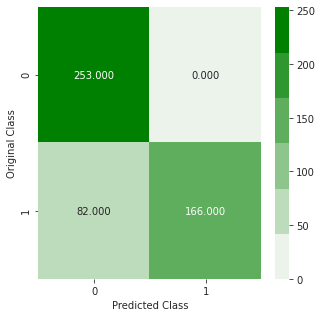

-------------------------------------------------- Precision matrix --------------------------------------------------


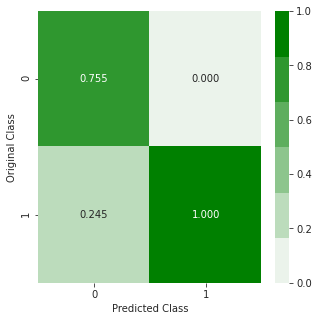

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


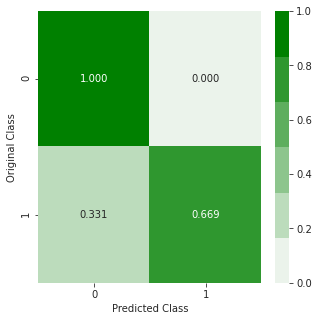

Sum of rows in precision matrix [1. 1.]


In [ ]:
from sklearn.metrics import log_loss
predict_y = clf.predict_proba(x_train)
print("the train log loss is",log_loss(y_train,predict_y,labels=best_xgb.classes_))
predict_y = clf.predict_proba(x_test)
print("the test log loss is",log_loss(y_test,predict_y,labels = best_xgb.classes_))
plot_confusion_matrix(y_test,clf.predict(x_test))

In [ ]:
from sklearn.metrics import f1_score
print("f1 score for train data",f1_score(y_train,clf.predict(x_train)))
print("f1 score for test data",f1_score(y_test,clf.predict(x_test)))

f1 score for train data 0.999415318651335
f1 score for test data 0.8019323671497584


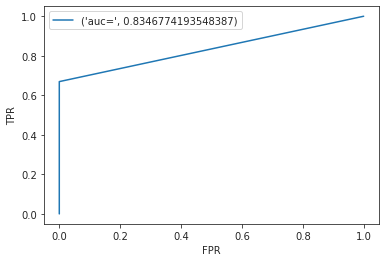

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,clf.predict(x_test))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr,label = ('auc=',auc_sc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

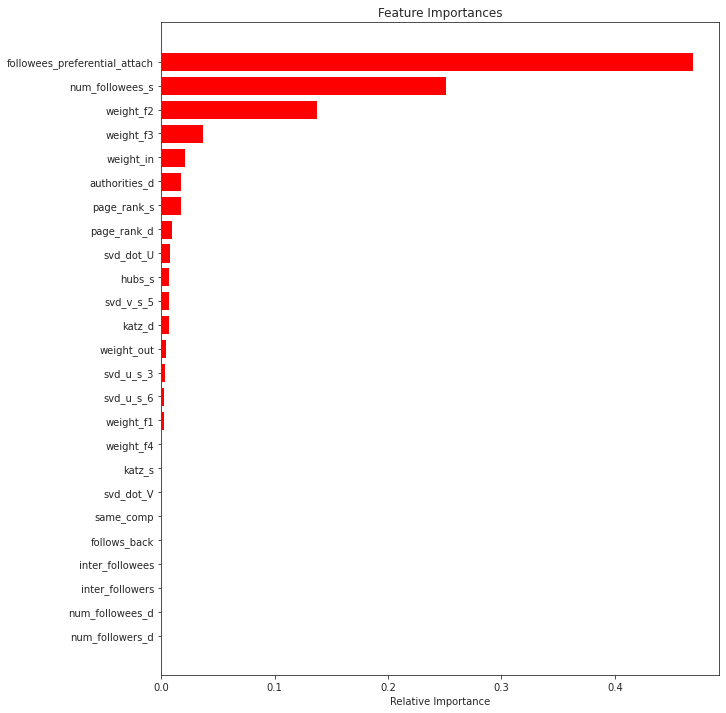

In [ ]:


features = df_final_train.columns
importances = best_xgb.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# from prettytable import PrettyTable
# t = PrettyTable()
# t.field_names=["model","train_f1_Score","test_f1_score"]
# t.add_row(["XGBoost","0.9920553921274338","0.9124241511382708"])
# print(t)